By: Russell Goldman (160136650)  
    Steven Tran     (170574740)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

h1 = "School Type"
h2 = "Percentage of Grade 3 Students Achieving the Provincial Standard in Reading"
h3 = "Percentage of Grade 3 Students Achieving the Provincial Standard in Writing"
h4 = "Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics"

h5 = "Percentage of Grade 6 Students Achieving the Provincial Standard in Reading"
h6 = "Percentage of Grade 6 Students Achieving the Provincial Standard in Writing"
h7 = "Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics"

h8 = 'Percentage of Children Who Live in Low-Income Households'
h9 = 'Percentage of Students Whose Parents Have Some University Education'

df = pd.read_excel("data/EQAO_Statistics.xlsx", sheet_name = "SIF_1718prelim_EQAO1718_EN")
df = df.loc[(df["School Level"] == "Elementary") & (df["School Type"] == "Catholic") | (df["School Type"] == "Public")]
df = df[[h1, h2, h3, h4, h5, h6, h7, h8, h9]]

dfGrade3 = df[[h1, h2, h3, h4, h8, h9]]
dfGrade3 = dfGrade3.groupby([h1]).mean()

dfGrade6 = df[[h1, h5, h6, h7, h8,h9]]
dfGrade6 = dfGrade6.groupby([h1]).mean()

# Newly added ---------------------------------------------------------------------------------------------

labels = ["Reading", "Writing", "Mathematics"] 
dfGrade3Income    = pd.DataFrame(index = dfGrade3.index)
dfGrade6Income    = pd.DataFrame(index = dfGrade6.index)
dfGrade3Education = pd.DataFrame(index = dfGrade3.index)
dfGrade6Education = pd.DataFrame(index = dfGrade6.index)


for num in range(3):
    IncomeDiff3 = []
    IncomeDiff6 = []
    EducationDiff3 = []
    EducationDiff6 = []
    for num2 in range(2):
        IncomeDiff3.append(100 - abs(dfGrade3.iat[num2,num] - dfGrade3.iat[num2, 3]))
        IncomeDiff6.append(100 - abs(dfGrade6.iat[num2,num] - dfGrade6.iat[num2, 3]))
        
        EducationDiff3.append(100 - abs(dfGrade3.iat[num2,num] - dfGrade3.iat[num2, 4]))
        EducationDiff6.append(100 - abs(dfGrade6.iat[num2,num] - dfGrade6.iat[num2, 4]))
    
    dfGrade3Income[labels[num]]    = IncomeDiff3
    dfGrade6Income[labels[num]]    = IncomeDiff6
    dfGrade3Education[labels[num]] = EducationDiff3
    dfGrade6Education[labels[num]] = EducationDiff6



# -------------------------------------------------------------------------------------------------------------


# ------Testing --------
# dfGrade3
# dfGrade3Income
# dfGrade3Education
# dfGrade6Income
# dfGrade6Education


,Reading,Writing,Mathematics
School Type,,,
Catholic,40.255687,43.076643,54.857742
Public,46.314859,49.996571,60.136865


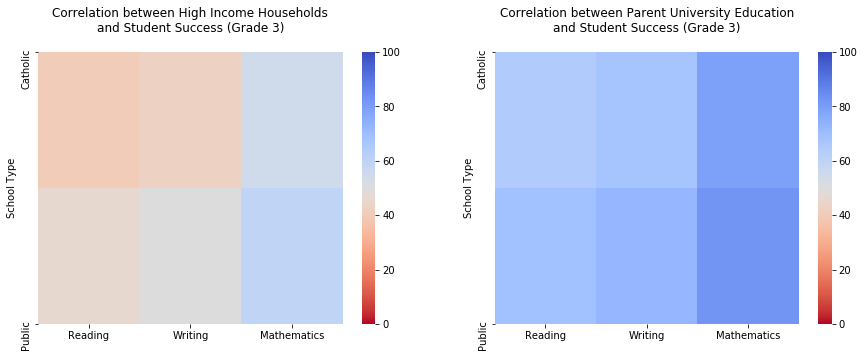

In [36]:
coolwarm = plt.cm.get_cmap('coolwarm')
warmcool = coolwarm.reversed()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(dfGrade3Income, ax=ax1, vmin=0, vmax=100, cmap=warmcool)
sns.heatmap(dfGrade3Education, ax=ax2, vmin=0, vmax=100, cmap=warmcool)
ax1.set_title('Correlation between High Income Households\n' + r'and Student Success (Grade 3)', pad=20)
ax2.set_title('Correlation between Parent University Education\n' + r'and Student Success (Grade 3)', pad=20)
plt.show()

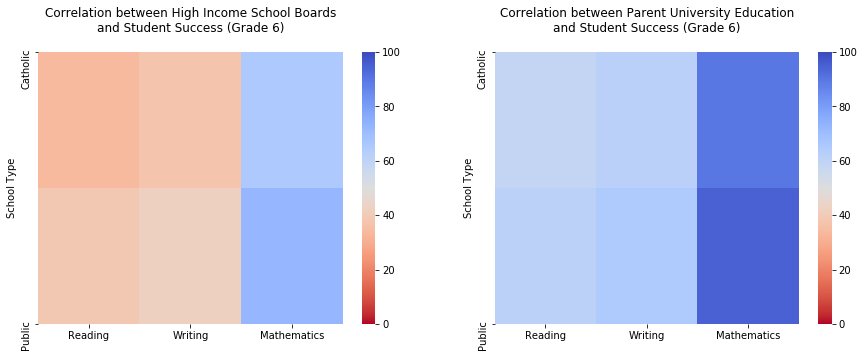

In [35]:
coolwarm = plt.cm.get_cmap('coolwarm')
warmcool = coolwarm.reversed()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(dfGrade6Income, ax=ax1, vmin=0, vmax=100, cmap=warmcool)
sns.heatmap(dfGrade6Education, ax=ax2, vmin=0, vmax=100, cmap=warmcool)
ax1.set_title('Correlation between High Income Households\n' + r'and Student Success (Grade 6)', pad=20)
ax2.set_title('Correlation between Parent University Education\n' + r'and Student Success (Grade 6)', pad=20)
plt.show()